In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.typing import NDArray
from python_utils.signal_utils.signal_1d import Signal

In [2]:
emg_data: NDArray = np.load("raw_emg_data.npy", allow_pickle=True)

In [3]:
emg_data.shape

(34, 10, 6)

In [4]:
# Filter the data
rescaled_data = np.zeros(emg_data.shape, dtype=object)
for i in range(emg_data.shape[0]):
    for j in range(emg_data.shape[1]):
        for k in range(emg_data.shape[2]):
            rescaled_data[i][j][k] = Signal(
                emg_data[i][j][k]
            ).clamp(
                -5.0, 
                5.0
            ).map(
                -5.0, 
                5.0, 
                -1.0, 
                1.0
            ).as_numpy()

In [5]:
# Filter the data
filtered_data = np.zeros(emg_data.shape, dtype=object)
for i in range(emg_data.shape[0]):
    for j in range(emg_data.shape[1]):
        for k in range(emg_data.shape[2]):
            filtered_data[i][j][k] = Signal(
                rescaled_data[i][j][k]
            ).compute_ffc(
                f = 1.0/60.0
            ).as_absolute().compute_moving_average(
                N = 200
            ).clamp(0.0, 1.0).as_numpy()

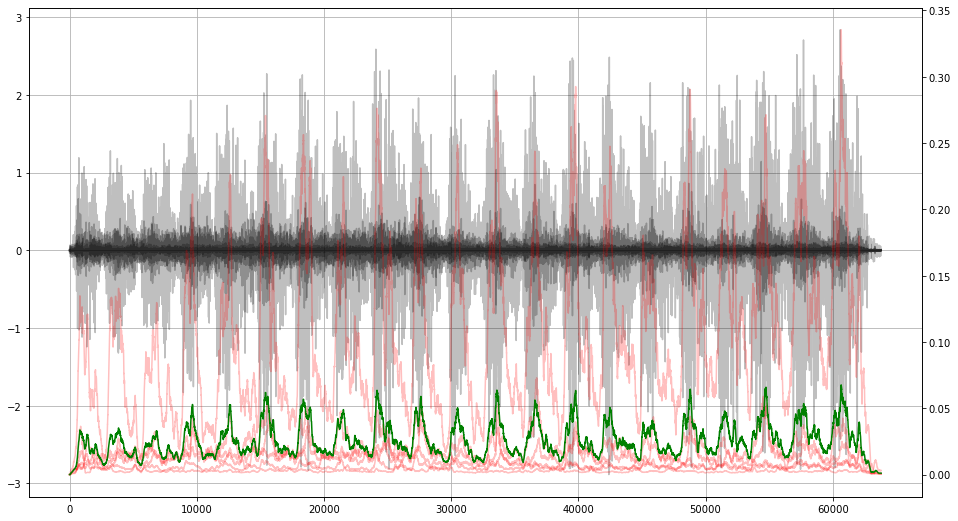

In [6]:
subject = 19
experiment = 5

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
# ax3 = ax.twinx()
ax3 = ax2
for i,emg in enumerate(emg_data[subject][experiment]):
    ax.plot(emg, alpha = 0.25, color = 'k')

# for channel in rescaled_data[subject][experiment]:
#     ax2.plot(channel, alpha = 0.25, color = 'r')

for channel in filtered_data[subject][experiment]:
    ax3.plot(channel, alpha = 0.25, color = 'r')

ax3.plot(np.average(filtered_data[subject][experiment], axis = 0), color = 'g')

ax.grid()
ax.set_axisbelow(True)

In [7]:
rescaled_data_squeezed = rescaled_data.reshape((rescaled_data.shape[0], rescaled_data.shape[1]*rescaled_data.shape[2]))

In [8]:
rescaled_data_squeezed.shape

(34, 60)

In [9]:
rescaled_data_avg = np.average(rescaled_data, axis = 2)

In [10]:
rescaled_data_avg.shape

(34, 10)

In [11]:
labels: NDArray = np.load("fatigue_borg_labels.npy", allow_pickle=True)

In [12]:
time_series_labels = np.zeros((labels.shape[0], labels.shape[1], (labels.shape[2]-2)*10000), dtype=object)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        for k in range(labels.shape[2]-2):
            for l in range(10000):
                time_series_labels[i][j][k*10000+l] = labels[i][j][k]

In [13]:
cubic_spline_labels = np.zeros((labels.shape[0], labels.shape[1]), dtype=object)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        x = labels[i][j]
        no_na_x = x[~np.isnan(x.astype(np.float64))]
        cubic_spline_labels[i][j] = Signal(
            data = no_na_x[:-1],
            t = np.array(np.arange(0, (no_na_x.size-2)*10, 10).tolist() + [no_na_x[-1]])
        ).pchip_interp(
            upsample_factor = 1000
        ).as_numpy()

In [14]:
cubic_spline_labels[0][0][-1]

20.0

87000.0 20.0


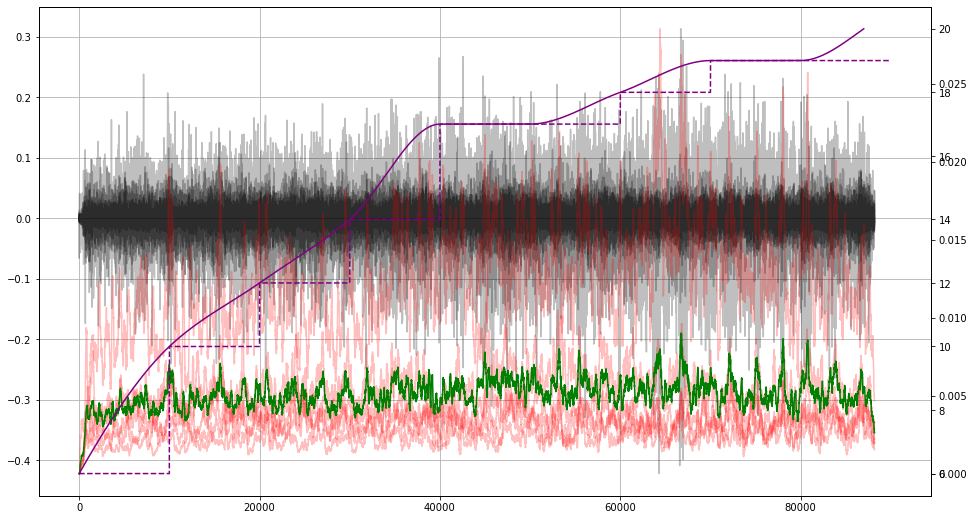

In [ ]:
subject = 8
experiment = 3

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
# ax3 = ax.twinx()
ax3 = ax2
ax4 = ax.twinx()
for i,emg in enumerate(emg_data[subject][experiment]):
    ax.plot(emg, alpha = 0.25, color = 'k')

# for channel in rescaled_data[subject][experiment]:
#     ax2.plot(channel, alpha = 0.25, color = 'r')

for channel in filtered_data[subject][experiment]:
    ax3.plot(channel, alpha = 0.25, color = 'r')

ax3.plot(np.average(filtered_data[subject][experiment], axis = 0), color = 'g')

ax4.plot(
    np.linspace(
        0, 
        cubic_spline_labels[subject][experiment].size, 
        cubic_spline_labels[subject][experiment].size, 
        endpoint=True
    ), cubic_spline_labels[subject][experiment], color = "purple")

ax4.plot(time_series_labels[subject][experiment], color = "purple", linestyle="--")

ax.grid()
ax.set_axisbelow(True)

print(np.linspace(
        0, 
        cubic_spline_labels[subject][experiment].size, 
        cubic_spline_labels[subject][experiment].size, 
        endpoint=True
    )[-1],cubic_spline_labels[subject][experiment][-1])